In [30]:
import pyspark
import pandas as pd
import numpy as np
import math

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, StringType, LongType, IntegerType, FloatType
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.feature import PCA
import matplotlib.pyplot as plt

from pyspark.sql.functions import col, mean, column
import matplotlib.pyplot as plt
from pyspark.sql.functions import expr
from pyspark.sql.functions import split
from pyspark.sql import Row
from pyspark.mllib.recommendation import ALS

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler, MinMaxScaler
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
import pandas as pd



In [31]:
spark = SparkSession.builder.appName("PCAExample1").getOrCreate()

In [32]:
df_raw = spark.read.csv("wildfire100.csv" , header = True, inferSchema = True)
column_names = df_raw.columns

df_raw = df_raw.drop("acq_date")
df_raw = df_raw.dropna()

In [33]:
feature_columns = df_raw.columns
assembler = VectorAssembler(inputCols = feature_columns, outputCol =  "features")
assembled_data = assembler.transform(df_raw)
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(assembled_data)

scaled_data = scaler_model.transform(assembled_data)



In [38]:
pca = PCA(k=10, inputCol="scaled_features", outputCol="pcaFeatues")
model = pca.fit(scaled_data)
result = model.transform(scaled_data)

print ("result", result)

result DataFrame[Polygon_ID: int, frp: double, Neighbour: int, Neighbour_frp: double, CBC2014_max: double, CBC2014_min: double, CBC2014_median: double, CBC2014_sum: double, CBC2014_mode: double, CBC2014_count: int, CBC2014_mean: double, CBD2012_max: double, CBD2012_min: double, CBD2012_median: double, CBD2012_sum: double, CBD2012_mode: double, CBD2012_count: int, CBD2012_mean: double, CBD2016_max: double, CBD2016_min: double, CBD2016_median: double, CBD2016_sum: double, CBD2016_mode: double, CBD2016_count: int, CBD2016_mean: double, CBH2012_max: double, CBH2012_min: double, CBH2012_median: double, CBH2012_sum: double, CBH2012_mode: double, CBH2012_count: int, CBH2012_mean: double, CBH2014_max: double, CBH2014_min: double, CBH2014_median: double, CBH2014_sum: double, CBH2014_mode: double, CBH2014_count: int, CBH2014_mean: double, CBH2016_max: double, CBH2016_min: double, CBH2016_median: double, CBH2016_sum: double, CBH2016_mode: double, CBH2016_count: int, CBH2016_mean: double, CC2012_m

In [35]:
explained_variance = model.explainedVariance
print ("Explained Variance:", sum(explained_variance))


Explained Variance: 0.7304159491523826


In [42]:
# Define the feature and label columns

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Split data into training and testing
train_data, test_data = result.randomSplit([0.8, 0.2], seed=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=100, seed=42)

# Train the Random Forest model
model = rf_classifier.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model using a MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# Print the accuracy
print("Test Accuracy:", accuracy)

IllegalArgumentException: label does not exist. Available: Polygon_ID, frp, Neighbour, Neighbour_frp, CBC2014_max, CBC2014_min, CBC2014_median, CBC2014_sum, CBC2014_mode, CBC2014_count, CBC2014_mean, CBD2012_max, CBD2012_min, CBD2012_median, CBD2012_sum, CBD2012_mode, CBD2012_count, CBD2012_mean, CBD2016_max, CBD2016_min, CBD2016_median, CBD2016_sum, CBD2016_mode, CBD2016_count, CBD2016_mean, CBH2012_max, CBH2012_min, CBH2012_median, CBH2012_sum, CBH2012_mode, CBH2012_count, CBH2012_mean, CBH2014_max, CBH2014_min, CBH2014_median, CBH2014_sum, CBH2014_mode, CBH2014_count, CBH2014_mean, CBH2016_max, CBH2016_min, CBH2016_median, CBH2016_sum, CBH2016_mode, CBH2016_count, CBH2016_mean, CC2012_max, CC2012_min, CC2012_median, CC2012_sum, CC2012_mode, CC2012_count, CC2012_mean, CC2014_max, CC2014_min, CC2014_median, CC2014_sum, CC2014_mode, CC2014_count, CC2014_mean, CC2016_max, CC2016_min, CC2016_median, CC2016_sum, CC2016_mode, CC2016_count, CC2016_mean, CH2012_max, CH2012_min, CH2012_median, CH2012_sum, CH2012_mode, CH2012_count, CH2012_mean, CH2014_max, CH2014_min, CH2014_median, CH2014_sum, CH2014_mode, CH2014_count, CH2014_mean, CH2016_max, CH2016_min, CH2016_median, CH2016_sum, CH2016_mode, CH2016_count, CH2016_mean, ELEV2016_max, ELEV2016_min, ELEV2016_median, ELEV2016_sum, ELEV2016_mode, ELEV2016_count, ELEV2016_mean, EVC2012_max, EVC2012_min, EVC2012_median, EVC2012_sum, EVC2012_mode, EVC2012_count, EVC2012_mean, EVC2014_max, EVC2014_min, EVC2014_median, EVC2014_sum, EVC2014_mode, EVC2014_count, EVC2014_mean, EVC2016_max, EVC2016_min, EVC2016_median, EVC2016_sum, EVC2016_mode, EVC2016_count, EVC2016_mean, EVH2012_max, EVH2012_min, EVH2012_median, EVH2012_sum, EVH2012_mode, EVH2012_count, EVH2012_mean, EVH2014_max, EVH2014_min, EVH2014_median, EVH2014_sum, EVH2014_mode, EVH2014_count, EVH2014_mean, EVH2016_max, EVH2016_min, EVH2016_median, EVH2016_sum, EVH2016_mode, EVH2016_count, EVH2016_mean, EVT2012_max, EVT2012_min, EVT2012_median, EVT2012_sum, EVT2012_mode, EVT2012_count, EVT2012_mean, EVT2014_max, EVT2014_min, EVT2014_median, EVT2014_sum, EVT2014_mode, EVT2014_count, EVT2014_mean, EVT2016_max, EVT2016_min, EVT2016_median, EVT2016_sum, EVT2016_mode, EVT2016_count, EVT2016_mean, FCCS2014_max, FCCS2014_min, FCCS2014_median, FCCS2014_sum, FCCS2014_mode, FCCS2014_count, FCCS2014_mean, FVC2016_max, FVC2016_min, FVC2016_median, FVC2016_sum, FVC2016_mode, FVC2016_count, FVC2016_mean, FVH2016_max, FVH2016_min, FVH2016_median, FVH2016_sum, FVH2016_mode, FVH2016_count, FVH2016_mean, FVT2016_max, FVT2016_min, FVT2016_median, FVT2016_sum, FVT2016_mode, FVT2016_count, FVT2016_mean, NVC2016_max, NVC2016_min, NVC2016_median, NVC2016_sum, NVC2016_mode, NVC2016_count, NVC2016_mean, SLP2016_max, SLP2016_min, SLP2016_median, SLP2016_sum, SLP2016_mode, SLP2016_count, SLP2016_mean, Neighbour_CBC2014_max, Neighbour_CBC2014_min, Neighbour_CBC2014_median, Neighbour_CBC2014_sum, Neighbour_CBC2014_mode, Neighbour_CBC2014_count, Neighbour_CBC2014_mean, Neighbour_CBD2012_max, Neighbour_CBD2012_min, Neighbour_CBD2012_median, Neighbour_CBD2012_sum, Neighbour_CBD2012_mode, Neighbour_CBD2012_count, Neighbour_CBD2012_mean, Neighbour_CBD2016_max, Neighbour_CBD2016_min, Neighbour_CBD2016_median, Neighbour_CBD2016_sum, Neighbour_CBD2016_mode, Neighbour_CBD2016_count, Neighbour_CBD2016_mean, Neighbour_CBH2012_max, Neighbour_CBH2012_min, Neighbour_CBH2012_median, Neighbour_CBH2012_sum, Neighbour_CBH2012_mode, Neighbour_CBH2012_count, Neighbour_CBH2012_mean, Neighbour_CBH2014_max, Neighbour_CBH2014_min, Neighbour_CBH2014_median, Neighbour_CBH2014_sum, Neighbour_CBH2014_mode, Neighbour_CBH2014_count, Neighbour_CBH2014_mean, Neighbour_CBH2016_max, Neighbour_CBH2016_min, Neighbour_CBH2016_median, Neighbour_CBH2016_sum, Neighbour_CBH2016_mode, Neighbour_CBH2016_count, Neighbour_CBH2016_mean, Neighbour_CC2012_max, Neighbour_CC2012_min, Neighbour_CC2012_median, Neighbour_CC2012_sum, Neighbour_CC2012_mode, Neighbour_CC2012_count, Neighbour_CC2012_mean, Neighbour_CC2014_max, Neighbour_CC2014_min, Neighbour_CC2014_median, Neighbour_CC2014_sum, Neighbour_CC2014_mode, Neighbour_CC2014_count, Neighbour_CC2014_mean, Neighbour_CC2016_max, Neighbour_CC2016_min, Neighbour_CC2016_median, Neighbour_CC2016_sum, Neighbour_CC2016_mode, Neighbour_CC2016_count, Neighbour_CC2016_mean, Neighbour_CH2012_max, Neighbour_CH2012_min, Neighbour_CH2012_median, Neighbour_CH2012_sum, Neighbour_CH2012_mode, Neighbour_CH2012_count, Neighbour_CH2012_mean, Neighbour_CH2014_max, Neighbour_CH2014_min, Neighbour_CH2014_median, Neighbour_CH2014_sum, Neighbour_CH2014_mode, Neighbour_CH2014_count, Neighbour_CH2014_mean, Neighbour_CH2016_max, Neighbour_CH2016_min, Neighbour_CH2016_median, Neighbour_CH2016_sum, Neighbour_CH2016_mode, Neighbour_CH2016_count, Neighbour_CH2016_mean, Neighbour_ELEV2016_max, Neighbour_ELEV2016_min, Neighbour_ELEV2016_median, Neighbour_ELEV2016_sum, Neighbour_ELEV2016_mode, Neighbour_ELEV2016_count, Neighbour_ELEV2016_mean, Neighbour_EVC2012_max, Neighbour_EVC2012_min, Neighbour_EVC2012_median, Neighbour_EVC2012_sum, Neighbour_EVC2012_mode, Neighbour_EVC2012_count, Neighbour_EVC2012_mean, Neighbour_EVC2014_max, Neighbour_EVC2014_min, Neighbour_EVC2014_median, Neighbour_EVC2014_sum, Neighbour_EVC2014_mode, Neighbour_EVC2014_count, Neighbour_EVC2014_mean, Neighbour_EVC2016_max, Neighbour_EVC2016_min, Neighbour_EVC2016_median, Neighbour_EVC2016_sum, Neighbour_EVC2016_mode, Neighbour_EVC2016_count, Neighbour_EVC2016_mean, Neighbour_EVH2012_max, Neighbour_EVH2012_min, Neighbour_EVH2012_median, Neighbour_EVH2012_sum, Neighbour_EVH2012_mode, Neighbour_EVH2012_count, Neighbour_EVH2012_mean, Neighbour_EVH2014_max, Neighbour_EVH2014_min, Neighbour_EVH2014_median, Neighbour_EVH2014_sum, Neighbour_EVH2014_mode, Neighbour_EVH2014_count, Neighbour_EVH2014_mean, Neighbour_EVH2016_max, Neighbour_EVH2016_min, Neighbour_EVH2016_median, Neighbour_EVH2016_sum, Neighbour_EVH2016_mode, Neighbour_EVH2016_count, Neighbour_EVH2016_mean, Neighbour_EVT2012_max, Neighbour_EVT2012_min, Neighbour_EVT2012_median, Neighbour_EVT2012_sum, Neighbour_EVT2012_mode, Neighbour_EVT2012_count, Neighbour_EVT2012_mean, Neighbour_EVT2014_max, Neighbour_EVT2014_min, Neighbour_EVT2014_median, Neighbour_EVT2014_sum, Neighbour_EVT2014_mode, Neighbour_EVT2014_count, Neighbour_EVT2014_mean, Neighbour_EVT2016_max, Neighbour_EVT2016_min, Neighbour_EVT2016_median, Neighbour_EVT2016_sum, Neighbour_EVT2016_mode, Neighbour_EVT2016_count, Neighbour_EVT2016_mean, Neighbour_FCCS2014_max, Neighbour_FCCS2014_min, Neighbour_FCCS2014_median, Neighbour_FCCS2014_sum, Neighbour_FCCS2014_mode, Neighbour_FCCS2014_count, Neighbour_FCCS2014_mean, Neighbour_FVC2016_max, Neighbour_FVC2016_min, Neighbour_FVC2016_median, Neighbour_FVC2016_sum, Neighbour_FVC2016_mode, Neighbour_FVC2016_count, Neighbour_FVC2016_mean, Neighbour_FVH2016_max, Neighbour_FVH2016_min, Neighbour_FVH2016_median, Neighbour_FVH2016_sum, Neighbour_FVH2016_mode, Neighbour_FVH2016_count, Neighbour_FVH2016_mean, Neighbour_FVT2016_max, Neighbour_FVT2016_min, Neighbour_FVT2016_median, Neighbour_FVT2016_sum, Neighbour_FVT2016_mode, Neighbour_FVT2016_count, Neighbour_FVT2016_mean, Neighbour_NVC2016_max, Neighbour_NVC2016_min, Neighbour_NVC2016_median, Neighbour_NVC2016_sum, Neighbour_NVC2016_mode, Neighbour_NVC2016_count, Neighbour_NVC2016_mean, Neighbour_SLP2016_max, Neighbour_SLP2016_min, Neighbour_SLP2016_median, Neighbour_SLP2016_sum, Neighbour_SLP2016_mode, Neighbour_SLP2016_count, Neighbour_SLP2016_mean, features, scaled_features, pcaFeatues

In [7]:
# Extract PCA loadings
# Assuming pca_model is the name of your PCA model instance
loadings = model.pc.toArray()

# For simplicity, let's analyze the loadings for the first principal component
pc1_loadings = loadings[:, 0]

# Pair the loadings with feature names and sort
feature_importance = sorted(list(zip(feature_columns, pc1_loadings)), key=lambda x: x[1], reverse=True)




In [ ]:
num_cluster_centers = 10

kmean = KMeans(featuresCol= "scaled_features").setK(num_cluster_centers).setSeed(1)

model= kmean.fit(scaled_data)

cluster_centers = model.clusterCenters()
clustered_data = model.transform(scaled_data)

evaluator = ClusteringEvaluator()
silhouetter_score = evaluator.evaluate(clustered_data)

wcss = model.summary.trainingCost

cluster_sizes = clustered_data.groupBy("prediction").count()
cluster_sizes.show()


In [26]:
cluster_profiles = clustered_data.groupBy('prediction').mean().collect()



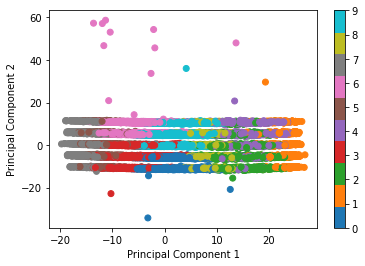

In [27]:
# First, apply KMeans clustering on the PCA results
kmean = KMeans(featuresCol="pcaFeatues", k=num_cluster_centers).setSeed(1)
kmeans_model = kmean.fit(result)
clustered_data = kmeans_model.transform(result)

# Extract PCA values and predictions
pca_values = clustered_data.select("pcaFeatues", "prediction").collect()
x = [row['pcaFeatues'][0] for row in pca_values]
y = [row['pcaFeatues'][1] for row in pca_values]
colors = [row['prediction'] for row in pca_values]

# Plotting
plt.scatter(x, y, c=colors, cmap='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


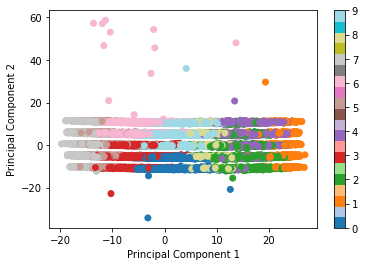

In [31]:
# Extract PCA values and predictions
# 2. Run KMeans clustering on the PCA-transformed data
kmean = KMeans(featuresCol="pcaFeatues", k=num_cluster_centers).setSeed(1)
kmeans_model = kmean.fit(result)
clustered_data = kmeans_model.transform(result)

# Confirming that the 'prediction' column exists


# 3. Visualize the clusters using the first two principal components
pca_values = clustered_data.select("pcaFeatues", "prediction").collect()
x = [row['pcaFeatues'][0] for row in pca_values]
y = [row['pcaFeatues'][1] for row in pca_values]
colors = [row['prediction'] for row in pca_values]

plt.scatter(x, y, c=colors, cmap='tab20')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()
